In [1]:
%load_ext watermark
%watermark

2020-11-04T09:00:09-05:00

CPython 3.8.3
IPython 7.16.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD
CPU cores  : 8
interpreter: 64bit


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6,6)

## Implementación análisis de sensibilidad - Método grafico
#### Integrantes

* Jairo Buitrago 20171020002
* Esteban Olaya 20171020135
* Diego González 20171020111

## Objetivo

Realizar el análisis de sensibilidad para los coeficientes de la función objetivo(FO) utlizando método gráfico.

## Ejercicio

Análisis de sensibilidad para los coeficientes de la función objetivo(FO)

$Max Z = 100x + 120y$

s.a.

$4x + 8y \leq 480 (1)$

$5x + 6y \leq 600 (2)$

$12x + 8y \leq 540 (3)$

$x,y \geq 0$ 

In [3]:
#Funciones que reciben como parámetro un punto en x y retornan el valor en y respectivo de las distintas restricciones.
def restriccion_1(x):
    return ((480/8)-(4*x/8))

def restriccion_2(x):
    return ((600/6)-(5*x/6))

def restriccion_3(x):
    return ((540/8)-(12*x/8))

#Función que recibe puntos de x y y, para retornar el valor que corresponde a la Z de la función objetivo.
def f_objetivo(x,y):
    z = (100*x)+(120*y)
    return z

In [4]:
#Arreglo que contiene los distintos puntos en x de las diferentes rectas o restricciones.
dataX1 = np.arange(-10,130,1)
dataX2 = np.arange(-10,130,1)
dataX3 = np.arange(-10,50,1)

#Arreglo que contiene los distintos puntos en y de las diferentes rectas o restricciones.
dataY1 = [restriccion_1(x) for x in dataX1]
dataY2 = [restriccion_2(x) for x in dataX2]
dataY3 = [restriccion_3(x) for x in dataX3]

<IPython.core.display.Javascript object>


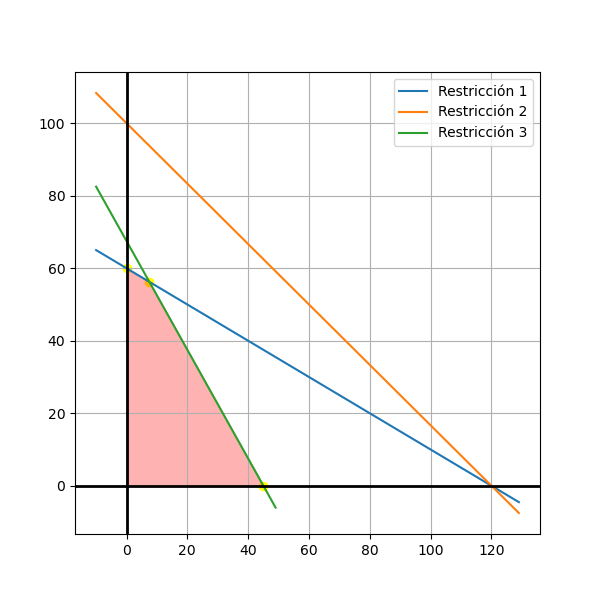

In [5]:
# Se grafican las distintas rectas
plt.plot(dataX1,dataY1,label="Restricción 1")
plt.plot(dataX2,dataY2,label="Restricción 2")
plt.plot(dataX3,dataY3,label="Restricción 3")
plt.legend()
plt.grid(True)

# Se grafican ejes X y Y
plt.axhline(0,color = 'k',lw =2)
plt.axvline(0,color = 'k',lw =2)

# Puntos de corte
puntos_corte = np.array([[0,60],[7.5,56.25],[45,0]])

#Señalar puntos de corte en la gráfica mediante puntos amarillos
for punto in puntos_corte:
    plt.scatter(punto[0],punto[1],c="yellow")

#Pintar región factible
plt.fill_between(puntos_corte[:,0],puntos_corte[:,1], alpha=0.3, color='red')


In [6]:
resultados = []

#Evaluar los puntos de corte en la función objetivo y obtener su resultado
for punto in puntos_corte:
    resultados.append(f_objetivo(punto[0], punto[1]))

# Mostrar solución
print("""
    Evaluaciones de los puntos de corte: {}
    Valores de "x" y "y" más optimos: {}
    Resultado más optimo: {}
""".format(resultados, puntos_corte[resultados.index(max(resultados))],max(resultados)))


    Evaluaciones de los puntos de corte: [7200.0, 7500.0, 4500.0]
    Valores de "x" y "y" más optimos: [ 7.5  56.25]
    Resultado más optimo: 7500.0



Solución:
Óptimo

$x = 7.5$

$y = 56.25$

$z = 7500$

## Análisis de sensibilidad para el coeficiente de x de la función objetivo

Cambiamos el valor de 100 por C.

$Max  Z = 100C + 120y$

Vemos que la solución optima pertenece al punto $[7.5,56.25]$ que corresponde a la intersección de la restriccion 1 y 3.

Y como nuestra función objetivo también es una recta, esta recta deberá pasar por nuestro punto de solución optima y además de esto debe estar contenida en el cono que se forman las restricciones 1 y 3, este cono se muestra a continuacion: 

<IPython.core.display.Javascript object>


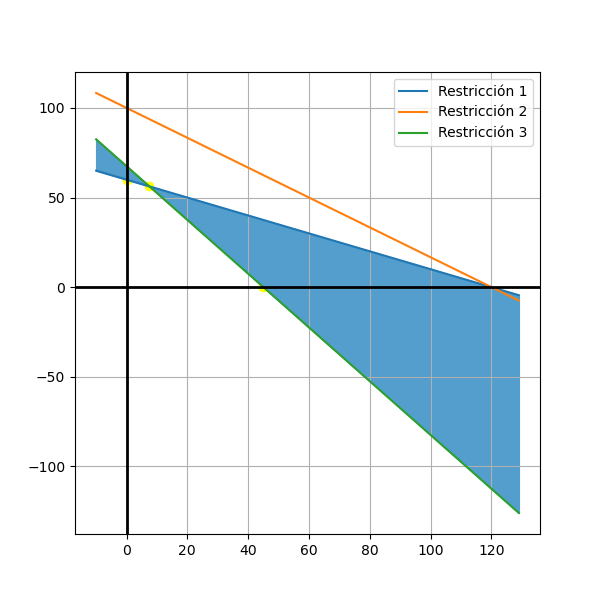

In [7]:
#Se modifican los puntos de la restricción 3
dataX3 = np.arange(-10,130,1)
dataY3 = [restriccion_3(x) for x in dataX3]

# Se grafican las distintas rectas
plt.plot(dataX1,dataY1,label="Restricción 1")
plt.plot(dataX2,dataY2,label="Restricción 2")
plt.plot(dataX3,dataY3,label="Restricción 3")
plt.legend()
plt.grid(True)

# Se grafican ejes X y Y
plt.axhline(0,color = 'k',lw =2)
plt.axvline(0,color = 'k',lw =2)

# Puntos de corte
puntos_corte = np.array([[0,60],[7.5,56.25],[45,0]])

#Señalar puntos de corte en la gráfica mediante puntos amarillos
for punto in puntos_corte:
    plt.scatter(punto[0],punto[1],c="yellow")

#Pintar región factible
plt.fill_between(dataX1, dataY1, dataY3, color='#539ecd')


Esto quiere decir que nuestra recta puede ser cualquiera de las rectas que se muestran a continuación pintadas de color rojo.

In [8]:
#Funciones que reciben como parámetro un punto en x y retornan el valor en y respectivo de las distintas rectas ejemplo.
def recta_1(x):
    return ((-15*x/14)+(450/7))

def recta_2(x):
    return ((-45*x/58)+(1800/29))

def recta_3(x):
    return ((-45*x/74)+(2250/37))

In [9]:
#Arreglo que contiene los distintos puntos en x de las diferentes rectas ejemplo.
ejemploX1 = np.arange(-10,130,1)
ejemploX2 = np.arange(-10,130,1)
ejemploX3 = np.arange(-10,130,1)

#Arreglo que contiene los distintos puntos en y de las diferentes rectas ejemplo.
ejemploY1 = [recta_1(x) for x in ejemploX1]
ejemploY2 = [recta_2(x) for x in ejemploX2]
ejemploY3 = [recta_3(x) for x in ejemploX3]

<IPython.core.display.Javascript object>


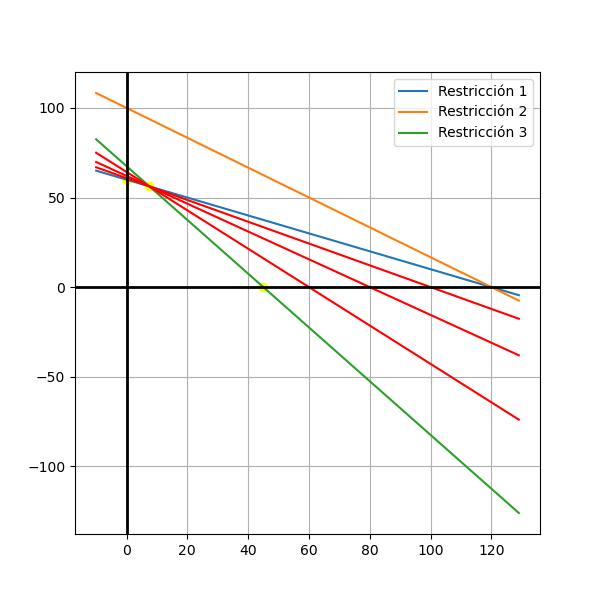

In [10]:
# Se grafican las distintas rectas
plt.plot(dataX1,dataY1,label="Restricción 1")
plt.plot(dataX2,dataY2,label="Restricción 2")
plt.plot(dataX3,dataY3,label="Restricción 3")
plt.plot(ejemploX1,ejemploY1,color = "r")
plt.plot(ejemploX2,ejemploY2,color = "r")
plt.plot(ejemploX3,ejemploY3,color = "r")
plt.legend()
plt.grid(True)


# Se grafican ejes X y Y
plt.axhline(0,color = 'k',lw =2)
plt.axvline(0,color = 'k',lw =2)

# Puntos de corte
puntos_corte = np.array([[0,60],[7.5,56.25],[45,0]])

#Señalar puntos de corte en la gráfica mediante puntos amarillos
for punto in puntos_corte:
    plt.scatter(punto[0],punto[1],c="yellow")

A continuación vamos a trabajar por medio de pendientes.

Para ello hallamos la pendiente de las rectas que limitan nuestro cono, en este caso las que corresponden a la restricción 1 y 3.

Las pendientes de las restricciones 1 y 3 son:

$ m3 = \dfrac{-12}{8} = \dfrac{-3}{2}$

$ m1 = \dfrac{-4}{8} = \dfrac{-1}{2}$

Y ahora la pendiente que representa la recta de la función objetivo es:
    
$ m = \dfrac{-C}{120}$

Esta pendiente se encuentra entre la pendiente de las rectas observadas anteriormente, es decir lo podemos plantear como una inecuación.

$\dfrac{-3}{2} \leq \dfrac{-C}{120} \leq \dfrac{-1}{2} $

Procedemos a resolverla

$\dfrac{1}{2} \leq \dfrac{C}{120} \leq \dfrac{3}{2} $

$60 \leq C \leq 180 $

Esto quiere decir que si C está entre 60 y 180, la solución optima es decir el punto $[7.5][56.25]$ seguirá siendo la solución optima y lo único que va varia es la función objetivo.